In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats

In [2]:
hp_train = pd.read_csv("Resources/House_prices_train.csv")
hp_test = pd.read_csv("Resources/House_prices_test.csv")


In [3]:
hp_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
hp_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
3,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
4,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [5]:
#missing value counts in each columns
missing_count = (hp_train.isnull().sum() / len(hp_train)) * 100
missing_count = missing_count[missing_count > 0]
print(missing_count.sort_values())

Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64


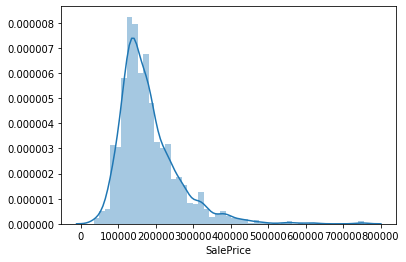

In [6]:
sns.distplot(hp_train["SalePrice"])

In [7]:
# Combining train and test data
#hp_train["data"] = 'train'
#hp_test['data'] = 'test'
#hp_test['SalePrice'] = np.nan
#hp_test = hp_test[hp_train.columns]
#hp = pd.concat([hp_train,hp_test],axis = 0)
#print("Shape of combined Data: ",hp.shape)
#hp.head()

In [8]:
#for hp in hp.columns: 
#    print(hp) 

In [9]:
#Transform target (SalePrice) variable by taking log class

target = np.log(hp_train["SalePrice"])

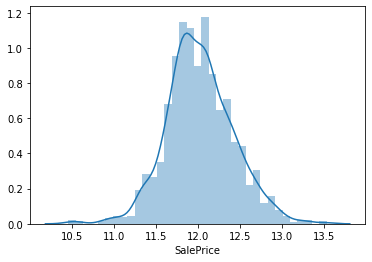

In [10]:
sns.distplot(target)

In [11]:
#finding numerical features
numeric_data=hp_train.select_dtypes(include = [np.number])

#finding categorical features
categorical_data=hp_train.select_dtypes(exclude = [np.number])

#print qty of numerical and categorical features
print ('There are {0} numerical  and {1} catagorical features in the training data'.\
       format(numeric_data.shape[1],categorical_data.shape[1]))


There are 38 numerical  and 43 catagorical features in the training data


In [12]:
#remove the id column from numeric data
del numeric_data ["Id"]
numeric_data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

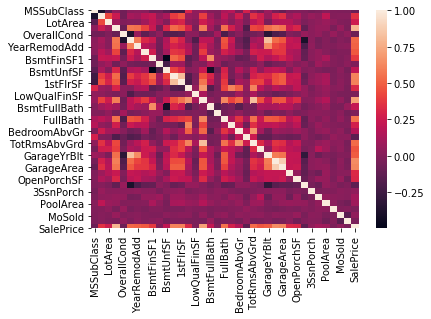

In [13]:
#correlation plot of the features in numeric_data
corr = numeric_data.corr()

#Plot the correlation matrix
sns.heatmap(corr)

<function matplotlib.pyplot.show(*args, **kw)>

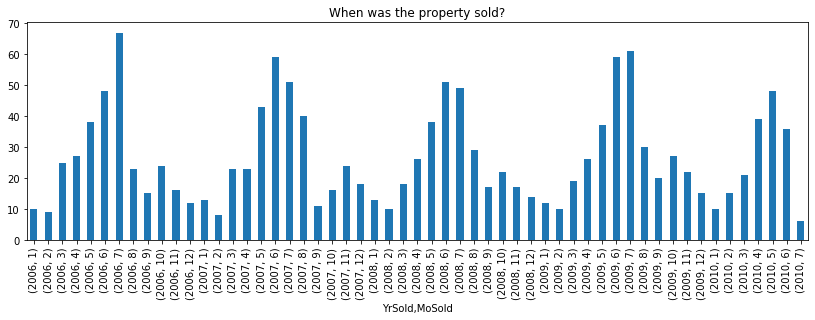

In [14]:
# when was the property sold in which year and month
hp_train.groupby(['YrSold',"MoSold"]).Id.count().plot(kind="bar",figsize=(14,4))
plt.title("When was the property sold?")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

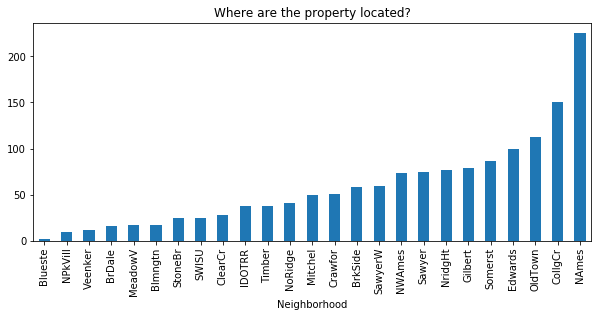

In [15]:
#where are the property located?
hp_train.groupby("Neighborhood").Id.count().\
    sort_values().\
    plot(kind="bar",figsize=(10,4))
plt.title("Where are the property located?")
plt.show

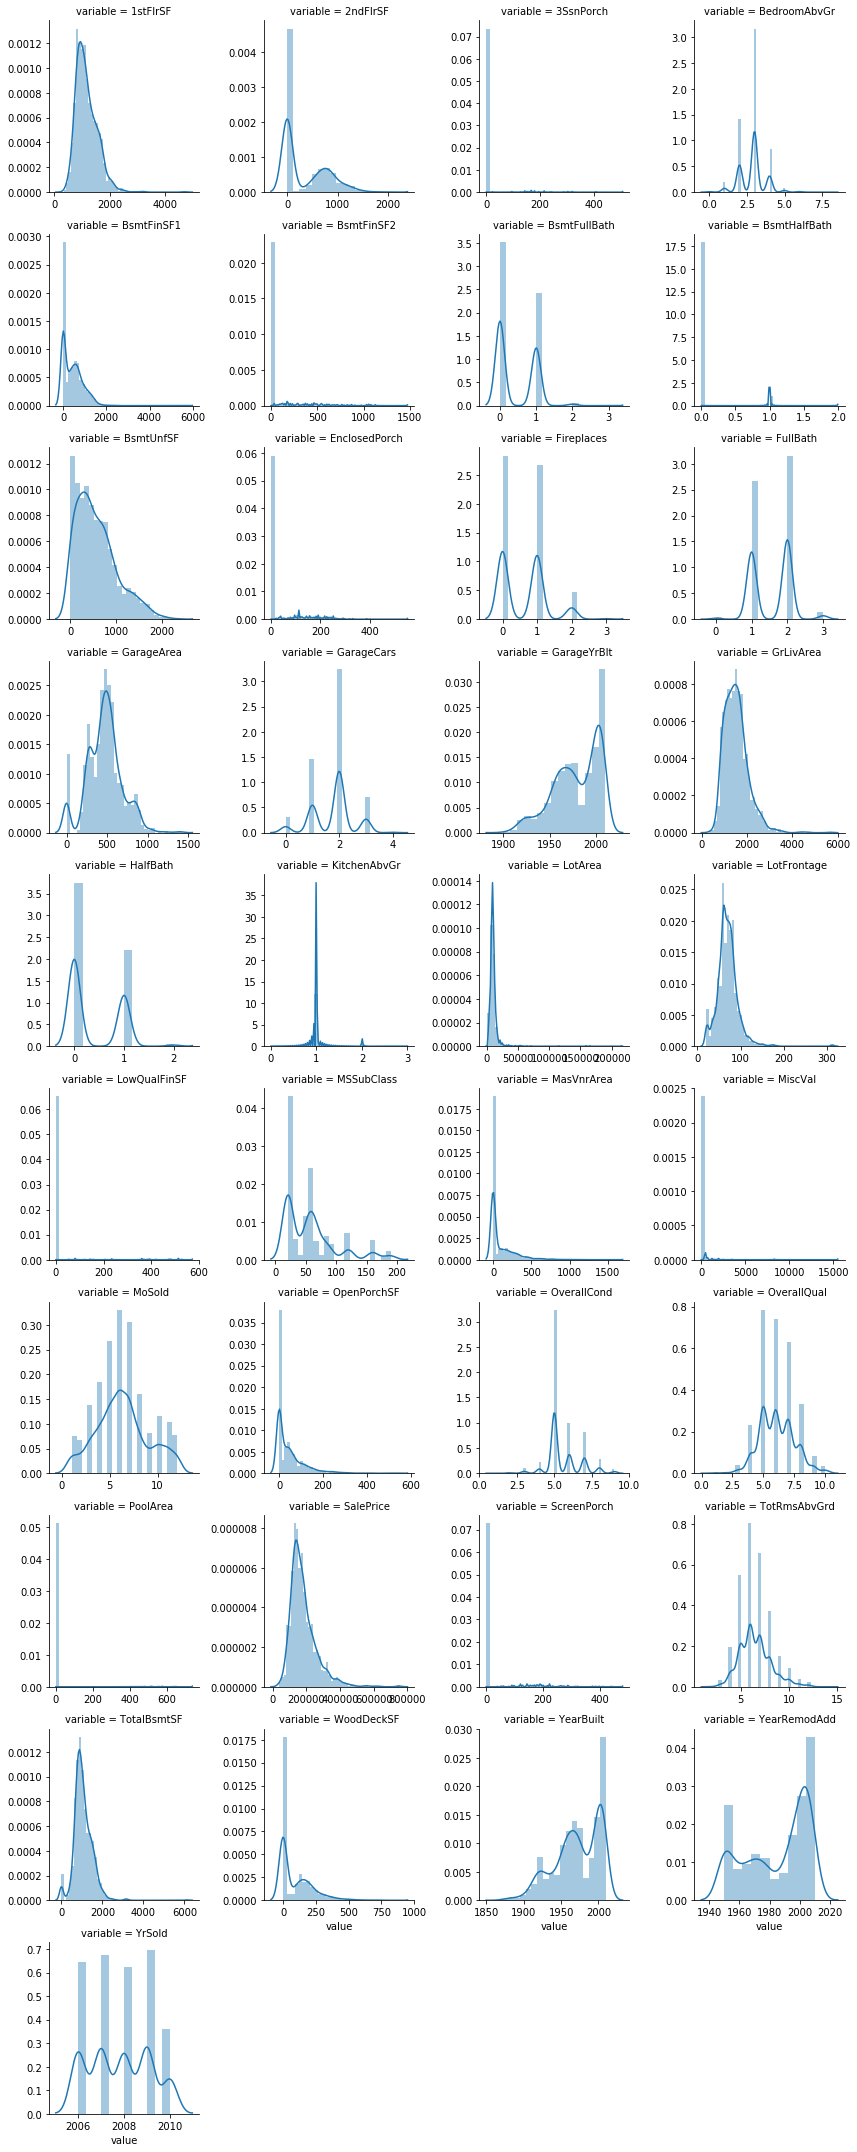

In [16]:
#distribution of numerical fetures
f = pd.melt(hp_train, value_vars=sorted(numeric_data))
g = sns.FacetGrid(f,col="variable",col_wrap=4,sharex=False, sharey=False)
g = g.map(sns.distplot,'value')

C:\Users\letic\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


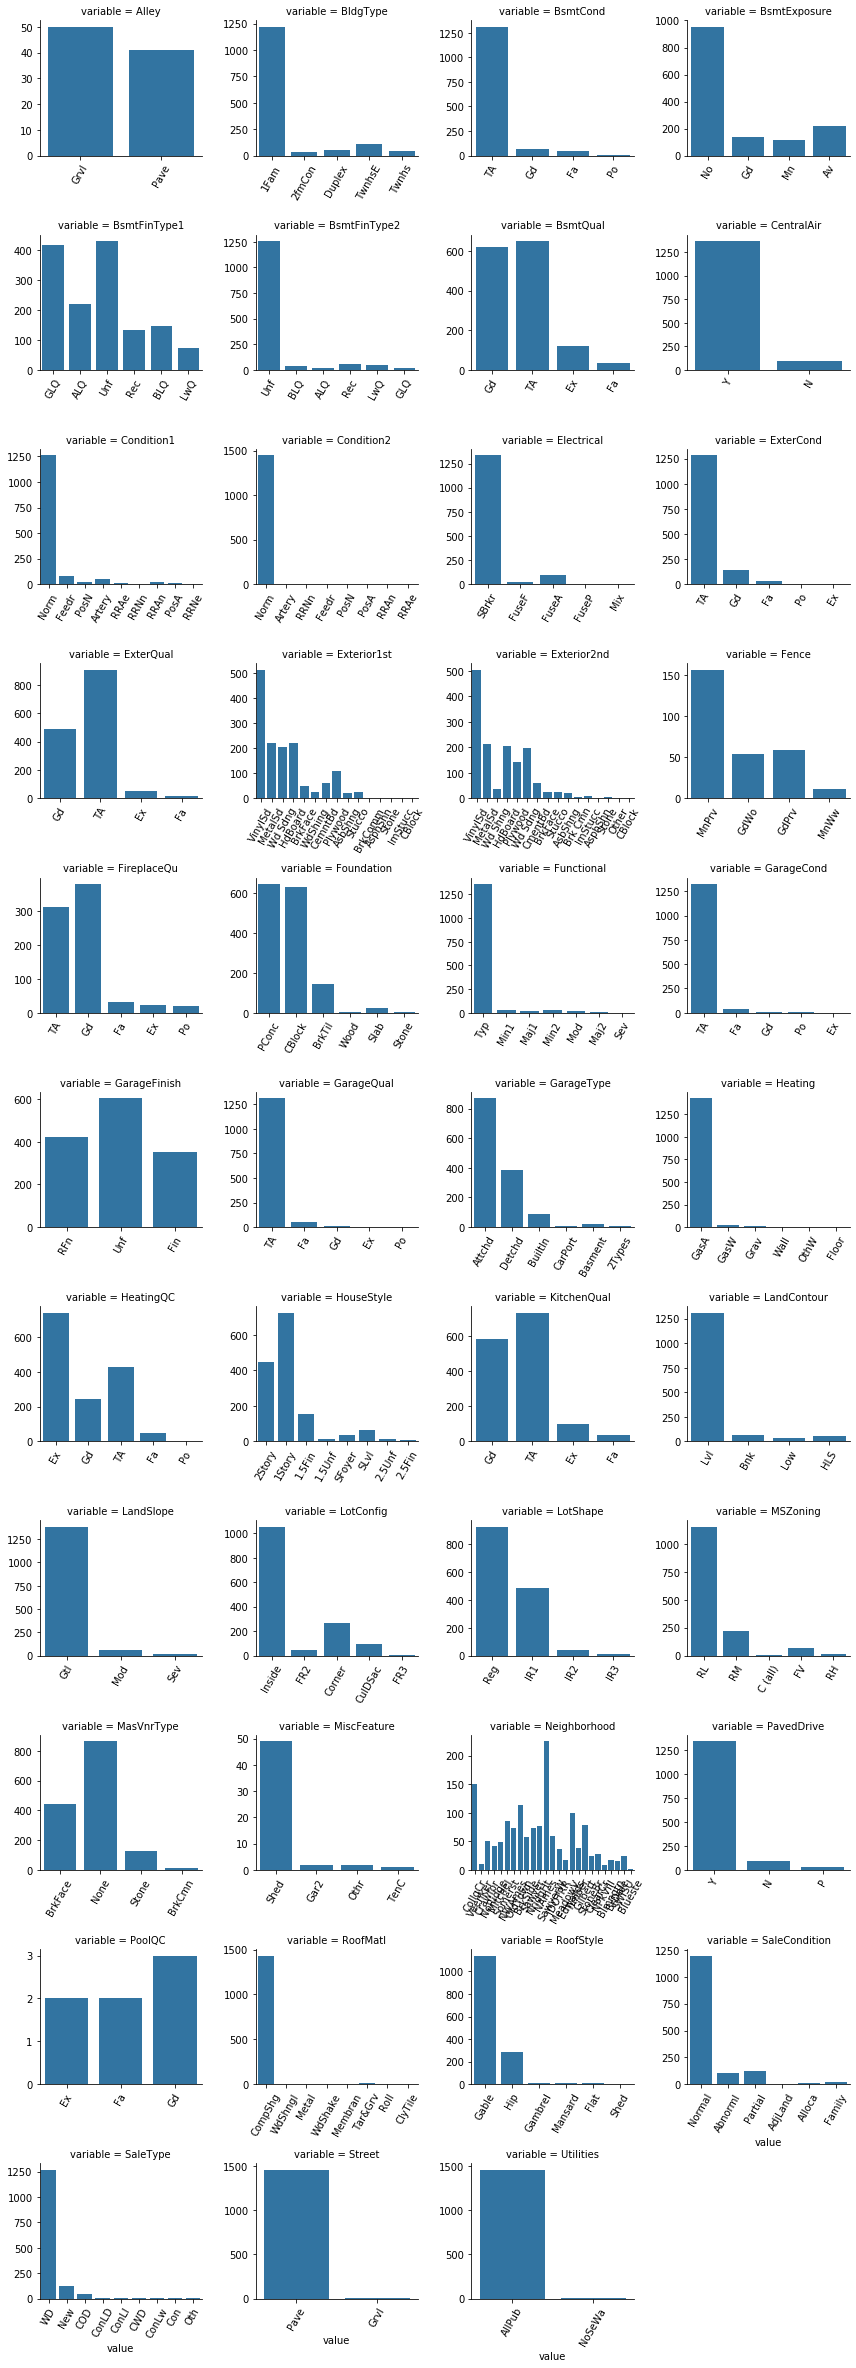

In [17]:
# plot count of categorical features
f = pd.melt(hp_train,value_vars = sorted(categorical_data))
g=sns.FacetGrid(f,col="variable",col_wrap=4,sharex=False,sharey=False)
plt.xticks(rotation="vertical")
g = g.map(sns.countplot,"value")
[plt.setp(ax.get_xticklabels(),rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [21]:

hp_train.Alley.replace({"Grvl":1,"Pave":2},inplace=True)

#lot shape

hp_train.LotShape.replace({"Reg":1,"IR1":2, "IR2":3,"IR3":4},inplace=True)

#building trype

#hp_train.BldgType.replace({"1Fam":1,"2fmCon":2, "Duplex":3,"TwnhsE":4, "Twnhs":5},inplace=True)

#Land Contour

hp_train.LandContour.replace({"Low":1,"HLS":2, "Bnk":3,"Lvl":4},inplace=True)

#Utilities

hp_train.Utilities.replace({"AllPub":1,"NoSeWa":2},inplace=True)

#Land Slope

hp_train.LandSlope.replace({"Sev":1,"Mod":2, "Gtl":3},inplace=True)

#Exterior Quality

hp_train.ExterQual.replace({"Gd":4,"TA":3, "Ex":5,"Fa":2},inplace=True)


#Exterior condition

hp_train.ExterCond.replace({"P0":1,"Fa":2, "TA":3,"Gd":4, "Ex":5},inplace=True)


#Basement Quality

hp_train.BsmtQual.replace({"Gd":1,"TA":2, "Exception":3,"NA":4, "Fa":5},inplace=True)

#Basement condition

hp_train.BsmtCond.replace({"Po":1,"Fa":2, "TA":3,"Gd":4, "Ex":5},inplace=True)


#Basement exposure

hp_train.BsmtExposure.replace({"No":1,"Gd":2, "Mn":3,"Av":4, "NA":5},inplace=True)


#Finished basement 1 Rating


hp_train.BsmtFinType1.replace({"GLQ":1,"ALQ":2, "Unf":3,"Rec":4, "BLQ":5,"NA":6, "LwQ":7},inplace=True)


# basement 2 Rating

hp_train.BsmtFinType2.replace({"Unf":1,"BLQ":2, "NA":3,"ALQ":4, "Rec":5,"LwQ":6, "GLQ":7},inplace=True)


#Heating Quality and condition

hp_train.HeatingQC.replace({"Po":1,"Fa":2, "TA":3,"Gd":4, "Ex":5},inplace=True)

#Kitchen quality


hp_train.KitchenQual.replace({"Po":1,"Fa":2, "TA":3,"Gd":4, "Ex":5},inplace=True)


#Home Functionality


hp_train.Functional.replace({"Sal":1,"Sev":2, "Maj2":3,"Maj1":4, "Mod":5,"Min2":6, "Min1":7},inplace=True)


#Fireplace Quality

hp_train.FireplaceQu.replace({"Po":1,"Fa":2, "TA":3,"Gd":4, "Ex":5, "NA":6},inplace=True)


#Garage Finish


hp_train.GarageFinish.replace({"Unf":1,"RFn":2, "Fin":3,"NA":4},inplace=True)


#Garage quality

hp_train.GarageQual.replace({"Po":1,"Fa":2, "TA":3,"Gd":4, "Ex":5, "NA":6},inplace=True)


#Garage condition

hp_train.GarageCond.replace({"Po":1,"Fa":2, "TA":3,"Gd":4, "Ex":5, "NA":6},inplace=True)


# Paved Driveway


hp_train.PavedDrive.replace({"N":1,"P":2, "Y":3},inplace=True)


#pool Quality
hp_train.PoolQC.replace({"Fa":2,"TA":3, "Gd":4, "Ex":5},inplace=True)



In [22]:
#Replace missing values with "0"
cat_to_num_features = ["Alley", "LotShape", "BldgType", "LandContour", "Utilities", "LandSlope", "ExterQual", "ExterCond",
                       "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "KitchenQual",
                       "Functional", "FireplaceQu", "GarageFinish", "GarageQual","GarageCond", "PavedDrive", "PoolQC"
]
hp_train[cat_to_num_features]=hp_train[cat_to_num_features].fillna(0)

In [24]:
#numerical features
numeric_data=hp_train.select_dtypes(include = [np.number])

#categorical features
categorical_data = hp_train.select_dtypes(exclude = [np.number])

#print quantity of each

print("there are {0} numerical and {1} categorical features in the training data".\
      format(numeric_data.shape[1],categorical_data.shape[1]))

there are 57 numerical and 24 categorical features in the training data


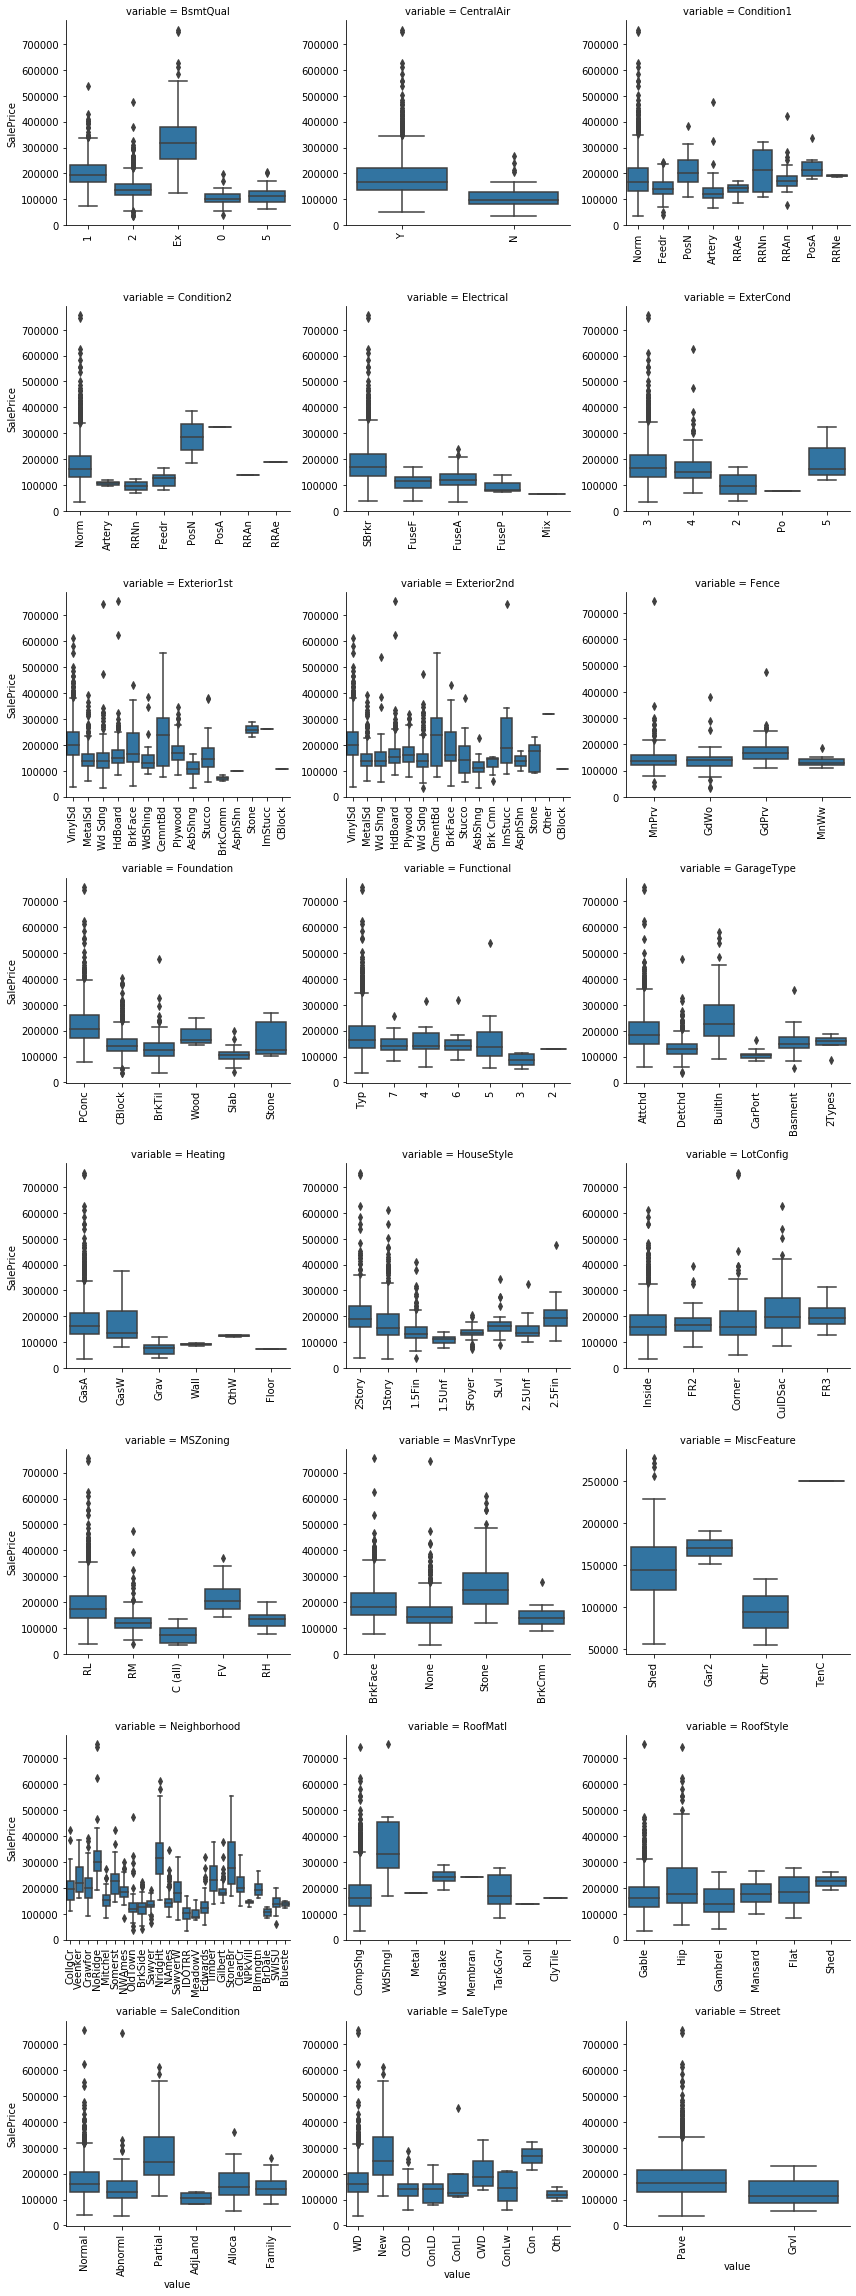

In [28]:
# plot count of categorical features
f = pd.melt(hp_train, id_vars = ['SalePrice'], value_vars = sorted(categorical_data))
g=sns.FacetGrid(f,col="variable",col_wrap=3,sharex=False,sharey=False, size=4)

g = g.map(sns.boxplot,"value", 'SalePrice')
[plt.setp(ax.get_xticklabels(),rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [37]:
cat_features = categorical_data.columns
hp_train[cat_features] = hp_train[cat_features].fillna("Missing")
#Onward

anova = {"feature":[],"f":[],"p":[]}
for cat in cat_features:
    group_prices = []
    for group in hp_train[cat].unique():
        group_prices.append(hp_train[hp_train[cat]== group]["SalePrice"].values)
    f, p = scipy.stats.f_oneway(*group_prices)
    anova["feature"].append(cat)
    anova["f"].append(f)
    anova["p"].append(p)
anova = pd.DataFrame(anova)
anova = anova[["feature","f","p"]]
anova.sort_values("p",inplace=True)

In [38]:
anova

,feature,f,p
3,Neighborhood,71.784865,1.558600e-225
14,BsmtQual,316.148635,8.158548e-196
13,Foundation,100.253851,5.791895e-91
19,GarageType,80.379992,6.117026e-87
11,MasVnrType,84.672201,1.054025e-64
23,SaleCondition,45.578428,7.988268e-44
9,Exterior1st,18.611743,2.586089e-43
10,Exterior2nd,17.500840,4.842186e-43
22,SaleType,28.863054,5.039767e-42
0,MSZoning,43.840282,8.817634e-35


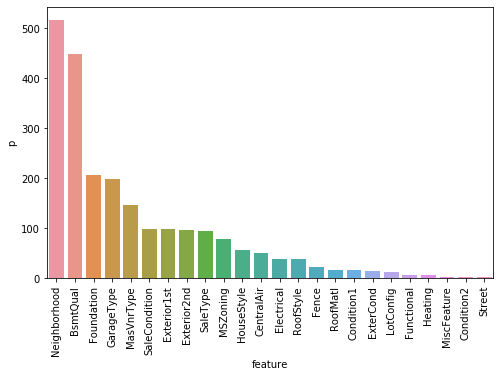

In [40]:
plt.figure(figsize=(8,5))
sns.barplot(anova.feature,np.log(1./anova["p"]))
plt.xticks(rotation=90)
plt.show()

In [45]:
#missing values
missing_values=(hp_train[cat_features] == "Missing").sum().sort_values(ascending=False)
missing_values[missing_values > 0]
hp_train.loc[hp_train.Electrical == "Missing","Electrica"] = hp_train.Electrical.mode()[0]

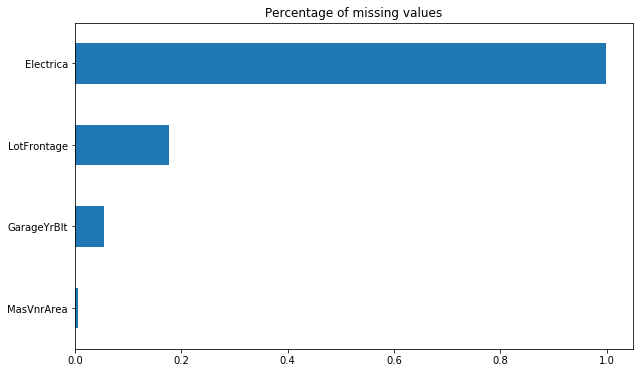

In [61]:
missing_data = hp_train.isnull().sum() / hp_train.shape[0]
missing_data[missing_data > 0].\
    sort_values(ascending=True).\
    plot(kind="barh",figsize=(10,6))
plt.title("Percentage of missing values")           
plt.show()
              

In [66]:
#lot frontage
hp_train.LotFrontage = hp_train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

#Garage Year built
hp_train.GarageYrBlt.fillna(0,inplace = True)

#Masonary Veneer Area 
hp_train.MasVnrArea.fillna(0,inplace = True)

In [71]:
#Correction
hp_train.MasVnrType.replace({"Missing":"None"},inplace=True)

#replace with mean value
hp_train.loc[(hp_train.MasVnrType == "None") & (hp_train.MasVnrArea > 1), "MasVnrType"] = "BrkFace"
hp_train.loc[(hp_train.MasVnrType == "None") & (hp_train.MasVnrArea ==1), "MasVnrArea"] = 0

for vnr_type in hp_train.MasVnrType.unique():
    hp_train.loc[(hp_train.MasVnrType == vnr_type) & (hp_train.MasVnrArea ==0), "MasVnrArea"] = \
    hp_train[hp_train.MasVnrType == vnr_type].MasVnrArea.mean()

In [74]:
missing_data = hp_train.isnull().sum() / hp_train.shape[0]
missing_data

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.000000
LotArea          0.000000
                   ...   
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Electrica        0.999315
Length: 82, dtype: float64

In [77]:
#look for duplicates

print("Train set duplicate IDs: {}".format(hp_train.duplicated("Id").sum()))
print("Test set duplicate IDs: {}".format(hp_test.duplicated("Id").sum()))

Train set duplicate IDs: 0
Test set duplicate IDs: 0


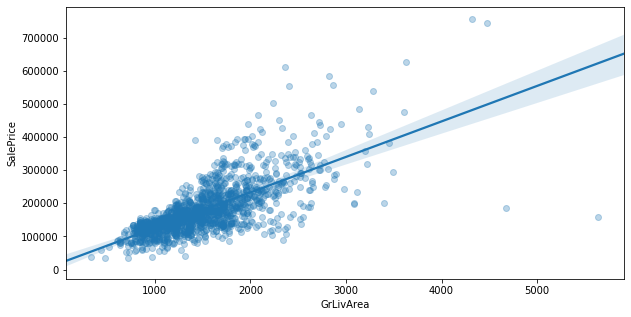

In [79]:
#look for outliers

plt.figure(figsize=(10,5))
sns.regplot(hp_train.GrLivArea,hp_train.SalePrice, scatter_kws = {"alpha":0.3})
plt.show()

In [80]:
#Remove houses with more than 4000 sq ft
hp_train.drop(hp_train[hp_train.GrLivArea >=4000].index, inplace = True)


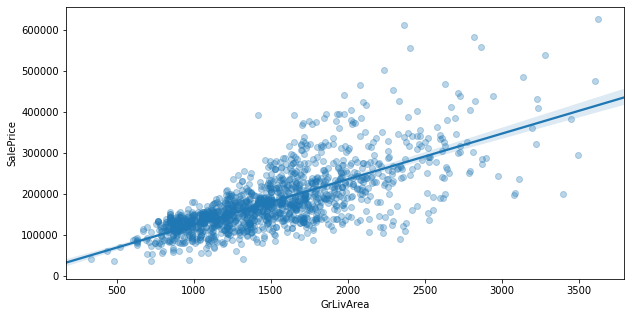

In [81]:
plt.figure(figsize=(10,5))
sns.regplot(hp_train.GrLivArea,hp_train.SalePrice, scatter_kws = {"alpha":0.3})
plt.show()

In [83]:
#total scare feet (area)
hp_train["TotalSF"] = hp_train.TotalBsmtSF + hp_train.GrLivArea
hp_train["TotalFloorSF"] = hp_train["1stFlrSF"] + hp_train["2ndFlrSF"]
hp_train["TotalPorchSF"] = hp_train.OpenPorchSF + hp_train.EnclosedPorch + \
hp_train["3SsnPorch"] + hp_train["ScreenPorch"]

In [85]:
#Yes-no boolean
hp_train["HasBasement"] = hp_train.TotalBsmtSF.apply(lambda x: 1 if x > 0 else 0)
hp_train["HasGarage"] = hp_train.GarageArea.apply(lambda x: 1 if x > 0 else 0)
hp_train["HasPorch"] = hp_train.TotalPorchSF.apply(lambda x: 1 if x > 0 else 0)
hp_train["HasPool"] = hp_train.PoolArea.apply(lambda x: 1 if x > 0 else 0)
hp_train["WasRemodeled"] = (hp_train.YearRemodAdd != hp_train.YearBuilt).astype(np.int64)
hp_train["IsNew"] = (hp_train.YearBuilt > 2000).astype(np.int64)
hp_train["WasCompleted"] = (hp_train.SaleCondition != "Partial").astype(np.int64)

In [ ]:
#Total bathrooms
hp_train["TotalBathrooms"] = hp_train.FullBath + .5 * hp_train.HalfBath + \
hp_train.BsmtFullBath + .5 * hp_train.BsmtHalfBath

In [99]:
#numerical features
numeric_data = hp_train.select_dtypes(include = [np.number])

#categorical features
categorical_data = hp_train.select_dtypes(exclude = [np.number])

print("There are {0} numerical and {1} categorical features in the training data".\
    format(numeric_data.shape[1],categorical_data.shape[1]))

num_features = numeric_data.columns
cat_features = categorical_data.columns
num_features = [f for f in num_features if f not in boolean_features]

There are 68 numerical and 25 categorical features in the training data


In [100]:
hp_train.to_csv(r'Resources/House_prices_train_FINAL.csv', index = False)